In [0]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
word_index = imdb.get_word_index()
word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_review = [word_index.get(i - 3, '?') for i in train_data[0]]

In [11]:
len(train_data)

25000

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_text = vectorize_sequences(test_data)

In [13]:
type(x_train)

numpy.ndarray

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
type(y_val)

numpy.ndarray

In [29]:
history = model.fit(partial_x_train,partial_y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 127us/step - loss: 0.6708 - acc: 0.6359 - val_loss: 0.5758 - val_acc: 0.8317
Epoch 2/4
15000/15000 [==============================] - 2s 109us/step - loss: 0.5643 - acc: 0.7464 - val_loss: 0.4700 - val_acc: 0.8715
Epoch 3/4
15000/15000 [==============================] - 2s 109us/step - loss: 0.4864 - acc: 0.8061 - val_loss: 0.3965 - val_acc: 0.8807
Epoch 4/4
15000/15000 [==============================] - 2s 108us/step - loss: 0.4289 - acc: 0.8461 - val_loss: 0.3520 - val_acc: 0.8847


In [30]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

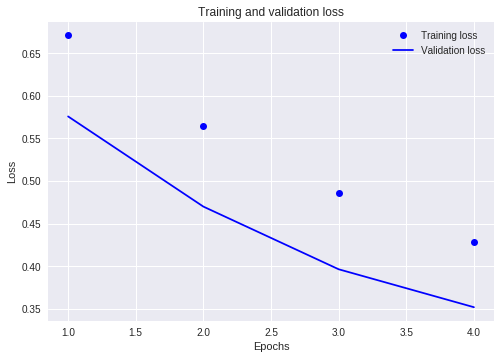

In [31]:
plt.figure()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

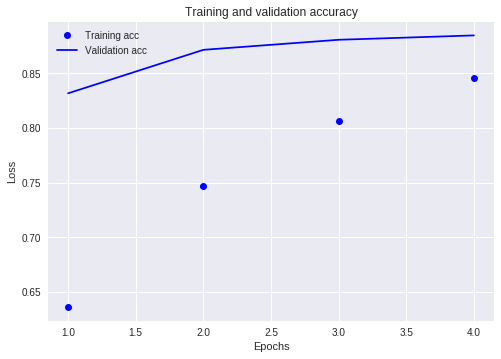

In [32]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
results = model.evaluate(x_text, y_test)

25000/25000 [==============================] - 3s 113us/step


In [34]:
results

[0.36303951608657836, 0.88084]

In [35]:
model.predict(x_text)

array([[0.31602818],
       [0.9717633 ],
       [0.8934865 ],
       ...,
       [0.18426757],
       [0.2419499 ],
       [0.47101322]], dtype=float32)

In [25]:
np.random.randint(0, high=2, size=(4,4))

array([[1, 1, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 1, 1],
       [0, 1, 1, 1]])